## Spatial overlays

Similar to GIS software, any spatial overlay operation is available in Python. This section analyzes the different types of spatial operations that can be performed using the `overlay` function in `GeoPandas`. 

In [4]:
import geopandas as gp
import matplotlib.pyplot as plt
from pathlib import Path

INPUT = Path.cwd().parents[0] / "00_data"
OUTPUT = Path.cwd().parents[0] / "out"

The paths to both files are defined for the execution of the overlay operation.

In [5]:
input_layer = gp.read_file (OUTPUT / "clipped.shp")
overlay_layer = gp.read_file(INPUT / "layers" / "border.shp")

For performing the overlay, the interested layers are defined in the overlay function. The `how` parameter in this function determines the type of analysis. 
The types of analysis are `intersection`, `union`, `difference`, `symmetric_difference`, `identity` that is defined in the following cells.

```{admonition} **Overlay Analysis**
:class: tip, dropdown
you can also visit [here](https://geopandas.org/en/stable/docs/user_guide/set_operations.html) for getting more familiar with overlay function analysis such as intersection.
```

- **intersection:** The shared area between two geometries.

In [6]:
out_intersection = gp.overlay(
    input_layer, overlay_layer,
    how='intersection')

- **union:** Merges two geometries into a single geometry.

In [7]:
out_union = gp.overlay(
    input_layer, overlay_layer,
    how='union')

/tmp/ipykernel_1626/4203413818.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 6 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  out_union = gp.overlay(


- **difference:** The portion of the first geometry that does not intersect with the second geometry.

In [8]:
out_difference = gp.overlay(
    input_layer, overlay_layer,
    how='difference')

- **symmetric_difference:** The areas that are in either of the two geometries, but not in both.

In [9]:
out_symmetric = gp.overlay(
    input_layer, overlay_layer,
    how='symmetric_difference')

/tmp/ipykernel_1626/1844746403.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 6 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  out_symmetric = gp.overlay(


- **identity:** The portion of the first geometry that overlaps with the second geometry, preserving the first shape of the first geometry.

In [10]:
out_identity = gp.overlay(
    input_layer, overlay_layer,
    how='identity')

The result will be printed out by using the `print` function.

In [11]:
out_symmetric.head()

,KS_IS,CLC_st1,CLC18,CLC,Biotpkt201,Shape_Leng,Shape_Area,Id,geometry
0,None,231,231,231.0,10.981298,1385.654150,12351.546010,NaN,"POLYGON ((403073.546 5657985.516, 403073.546 5..."
1,None,231,231,231.0,10.981298,2978.763179,42370.388201,NaN,"POLYGON ((402946.976 5658011.263, 402946.976 5..."
2,None,324,324,324.0,14.000424,637.802661,5121.556248,NaN,"POLYGON ((402650.192 5658099.787, 402650.192 5..."
3,None,122,122,122.0,5.271487,346.752729,5474.275433,NaN,"POLYGON ((403391.503 5657950.47, 403391.503 56..."
4,HW,122,None,NaN,5.271487,1096.631901,2365.341424,NaN,"POLYGON ((403391.503 5657950.47, 403389.219 56..."


Then visualize the output using the `Plot` function.

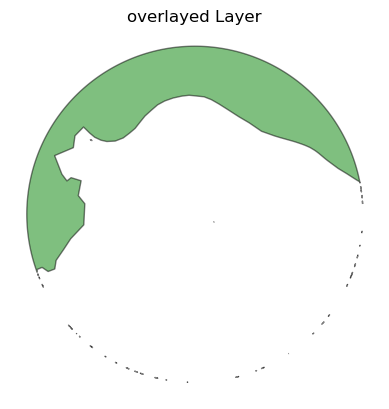

In [12]:
ax = out_symmetric.plot(color="green", alpha=0.5, edgecolor="black")
ax.set_title("overlayed Layer")
ax.set_axis_off()